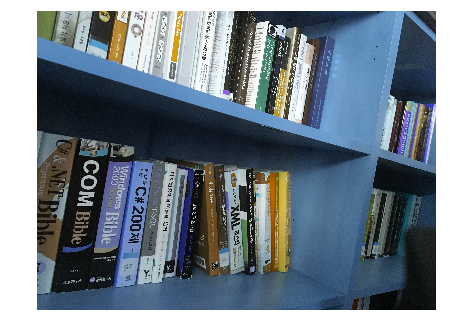

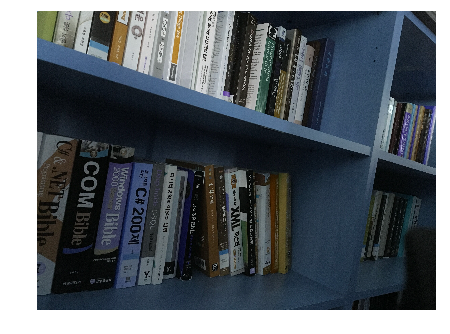

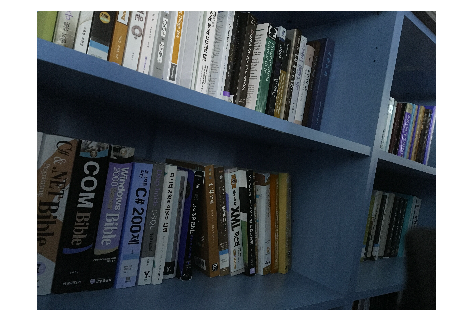

In [27]:

    
import cv2
import numpy as np

from matplotlib import pyplot as plt

img1 = cv2.imread("HW2-1.jpg")
img2 = cv2.imread("HW2-2.jpg")
img3 = cv2.imread("HW2-3.jpg")

plt.plot([3,1,1])
plt.imshow(img1)
plt.axis('off')
plt.show()

plt.plot([3,1,2])
plt.imshow(img3)
plt.axis('off')
plt.show()

plt.plot([3,1,3])
plt.imshow(img3)
plt.axis('off')
plt.show()





Reading images ... 
Aligning images ... 
Calculating Camera Response Function (CRF) ... 
Merging images into one HDR image ... 
saved hdrDebevec.hdr 
Tonemaping using Drago's method ... 
saved ldr-Drago.jpg
Tonemaping using Durand's method ... 
saved ldr-Durand.jpg
Tonemaping using Reinhard's method ... 
saved ldr-Reinhard.jpg
Tonemaping using Mantiuk's method ... 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


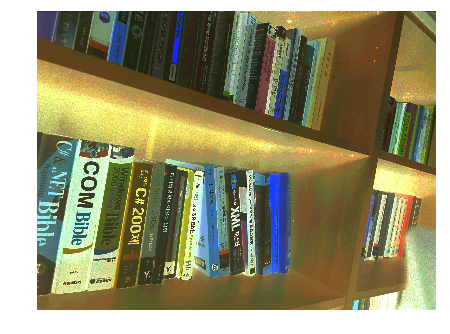

In [28]:
def readImagesAndTimes():
  # List of exposure times
  times = np.array([ 1/30.0, 0.25, 2.5, 15.0 ], dtype=np.float32)
   
  # List of image filenames

  filenames = [img1,img2,img3,img1]
  images = []
  for filename in filenames:
    im = filename
    images.append(im)
   
  return images, times

if __name__ == '__main__':
    # Read images and exposure times
    print("Reading images ... ")

    images, times = readImagesAndTimes()


# #
    # Align input images
    print("Aligning images ... ")
    alignMTB = cv2.createAlignMTB()
    alignMTB.process(images, images)
# #
    # Obtain Camera Response Function (CRF)
    print("Calculating Camera Response Function (CRF) ... ")
    calibrateDebevec = cv2.createCalibrateDebevec()
    responseDebevec = calibrateDebevec.process(images, times)
#
    # Merge images into an HDR linear image
    print("Merging images into one HDR image ... ")
    mergeDebevec = cv2.createMergeDebevec()
    hdrDebevec = mergeDebevec.process(images, times, responseDebevec)


    # Save HDR image.
    cv2.imwrite("hdrDebevec.hdr", hdrDebevec)
    print("saved hdrDebevec.hdr ")

    # Tonemap using Drago's method to obtain 24-bit color image
    print("Tonemaping using Drago's method ... ")
    tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
    ldrDrago = tonemapDrago.process(hdrDebevec)
    ldrDrago = 3 * ldrDrago
    cv2.imwrite("ldr-Drago.jpg", ldrDrago * 255)
    print("saved ldr-Drago.jpg")
#
    # Tonemap using Durand's method obtain 24-bit color image
    print("Tonemaping using Durand's method ... ")
    tonemapDurand = cv2.createTonemapDurand(1.5, 4, 1.0, 1, 1)
    ldrDurand = tonemapDurand.process(hdrDebevec)
    ldrDurand = 3 * ldrDurand
    cv2.imwrite("ldr-Durand.jpg", ldrDurand * 255)
    print("saved ldr-Durand.jpg")
#
    # Tonemap using Reinhard's method to obtain 24-bit color image
    print("Tonemaping using Reinhard's method ... ")
    tonemapReinhard = cv2.createTonemapReinhard(1.5, 0, 0, 0)
    ldrReinhard = tonemapReinhard.process(hdrDebevec)
    cv2.imwrite("ldr-Reinhard.jpg", ldrReinhard * 255)
    print("saved ldr-Reinhard.jpg")

    # Tonemap using Mantiuk's method to obtain 24-bit color image
    print("Tonemaping using Mantiuk's method ... ")
    tonemapMantiuk = cv2.createTonemapMantiuk(2.2, 0.85, 1.2)
    ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
    ldrMantiuk = 3 * ldrMantiuk
    # cv2.imwrite("ldr-Mantiuk.jpg", ldrMantiuk * 255)
    # print("saved ldr-Mantiuk.jpg")

    plt.imshow(ldrMantiuk)
    plt.axis('off')
    plt.show()